Ashley Foster
Project 3 - Part B - Gradient Boosting Regressor
11/19/25

For Part B, I looked into a few non-logistic regression models and came up with Gradient Boosting Regression. I will be implementing that here. But first, I will clean the data as I did in Part A.

In [2]:
import pandas as pd

df = pd.read_csv('cleaned_data_project3.csv')
df.fillna('0', inplace=True)
df.drop(columns = ['x31'], inplace=True)  # Dropping x31 because it had too many missing values
df = df.replace(r'#','', regex = True)
df = df.replace(r'\(', '', regex = True)
df = df.replace(r'\)', '', regex = True)
df = df.replace('&', '', regex = True)
df = df.replace('Female', 0, regex = True)
df = df.replace('Male', 1, regex = True)
df = df.rename(columns = {'x3':'gender', 'x5':'age'})
df['x14'] = df['x14'].replace(' ', 0, regex = True).astype(int)
df['x2'] = df['x2'].astype(int)
df['x29'] = df['x29'].astype(int)
df['x25'] = df['x25'].replace(r'D\_C', 0, regex = True)
df['x25'] = df['x25'].replace(r'L\_C', 1, regex = True)
df['x26'] = df['x26'].replace('Bt', 0, regex= True)
df['x26'] = df['x26'].replace('PT', 1, regex= True)
df.describe()

C:\Users\Ashley\AppData\Local\Temp\ipykernel_16752\1533638244.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Male', 1, regex = True)
C:\Users\Ashley\AppData\Local\Temp\ipykernel_16752\1533638244.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['x25'] = df['x25'].replace(r'L\_C', 1, regex = True)
C:\Users\Ashley\AppData\Local\Temp\ipykernel_16752\1533638244.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicit

,Unnamed: 0,y,x2,gender,age,x9,x10,x11,x12,x13,...,x25,x26,x28,x29,x30,x4,x6,x2_freq,x24_freq,x29_freq
count,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,...,104722.000000,104722.000000,104722.000000,104722.000000,104722.0,104722.0,104722.000000,104722.000000,104722.000000,104722.000000
mean,52360.500000,0.431380,51956.159795,0.492542,39.189273,2.728892,3.062986,2.755591,2.977187,3.201419,...,0.817364,0.313172,1.976089,1187.443355,0.0,4.0,39.189273,1.015622,33216.139761,112.942247
std,30230.781782,0.495271,29992.879945,0.499947,15.208026,1.326905,1.525021,1.398492,1.277116,1.329776,...,0.386370,0.463786,0.962887,995.773231,0.0,0.0,15.208026,0.124010,28636.472657,103.089645
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,31.000000,0.0,4.0,7.000000,1.000000,1.000000,1.000000
25%,26180.250000,0.000000,25978.250000,0.000000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,0.000000,1.000000,414.000000,0.0,4.0,27.000000,1.000000,1064.000000,29.000000
50%,52360.500000,0.000000,51952.500000,0.000000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,0.000000,2.000000,842.000000,0.0,4.0,40.000000,1.000000,58612.000000,89.000000
75%,78540.750000,1.000000,77934.750000,1.000000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,3.000000,1739.000000,0.0,4.0,51.000000,1.000000,58612.000000,168.000000
max,104721.000000,1.000000,103903.000000,1.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,3.000000,4983.000000,0.0,4.0,85.000000,2.000000,58612.000000,667.000000


Now, to implement the Random Forest Classifier and tune the hyperparameters.

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

y = df['y']
x = df.drop(columns=['y'])
#using the same random state as in Part A for consistency
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=93)

rf = RandomForestClassifier()

In [4]:
#Hyperparameter tuning using RandomizedSearchCV
param_dist = {'n_estimators': [50, 100, 250],
              'max_depth': [None, 10, 20, 30, 40],
              'min_samples_split': [2, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2']}

rand_rfsearch = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy')
rand_rfsearch.fit(x_train, y_train)

C:\Users\Ashley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ashley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


The best parameter fits are: 
n_estimators: 250
Max_depth: 30
min_samples_split: 2
max_features: 'sqrt'

In [5]:
print(rand_rfsearch.best_params_)
best_rf = rand_rfsearch.best_estimator_

{'n_estimators': 250, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 40}


In [6]:
best_params = {'n_estimators': 250, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 30}
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)

,n_estimators,250
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Now measuring how good the model was for the data:

In [7]:
#accuracy
acc = metrics.accuracy_score(y_test, best_rf.predict(x_test))
print(f'Accuracy: {acc:.4f}')

#precision
prec = metrics.precision_score(y_test, best_rf.predict(x_test))
print(f'Precision: {prec:.4f}')

#recall
rec = metrics.recall_score(y_test, best_rf.predict(x_test))
print(f'Recall: {rec:.4f}')

#f1 score
f1 = metrics.f1_score(y_test, best_rf.predict(x_test))
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9661
Precision: 0.9765
Recall: 0.9440
F1 Score: 0.9600


Now for the confusion matrix and roc-auc curve.

<Axes: >

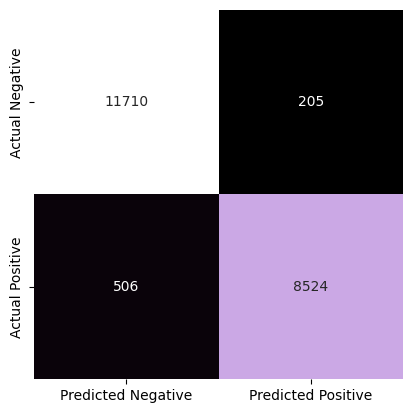

In [8]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, best_rf.predict(x_test))
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='cubehelix', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

ROC-AUC: 0.9945


C:\Users\Ashley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


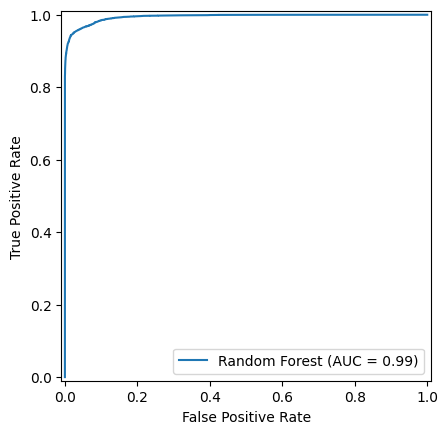

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_rf.predict_proba(x_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(f'ROC-AUC: {roc_auc:.4f}')
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()

Roc-AUC (Train): 1.0000


C:\Users\Ashley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


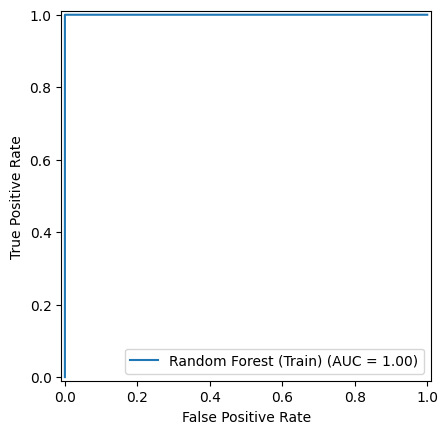

In [10]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, best_rf.predict_proba(x_train)[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)
print(f'Roc-AUC (Train): {roc_auc_train:.4f}')
display_train = metrics.RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train,estimator_name='Random Forest (Train)')
display_train.plot()